<a href="https://colab.research.google.com/github/yajnyaseniskk/PythonProject/blob/main/Customer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of customers
n_customers = 500

# Generate synthetic features
ages = np.random.randint(18, 70, n_customers)
genders = np.random.randint(0, 2, n_customers)  # 0: Female, 1: Male
income = np.random.normal(50, 15, n_customers).round(2)  # Mean: 50k, Std: 15k
purchase_freq = np.random.poisson(3, n_customers)  # Avg 3 purchases/month

# Simulate churn: likely to churn if income < 40 and purchase_freq < 3
churn = ((income < 40) & (purchase_freq < 3)).astype(int)

# Create DataFrame
df_customers = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'Income': income,
    'PurchaseFrequency': purchase_freq,
    'Churn': churn
})

# Save to CSV
df_customers.to_csv("customers.csv", index=False)

print("Customer data created and saved to 'customers.csv'")
print(df_customers.head())


Customer data created and saved to 'customers.csv'
   Age  Gender  Income  PurchaseFrequency  Churn
0   56       1   24.45                  2      1
1   69       0   49.17                  2      0
2   46       0   55.76                  4      0
3   32       1   49.51                  4      0
4   60       0   18.99                  1      1


That means:

If a customer has low income (< 40k) and rarely shops (< 3 times/month), we label them as Churn = 1 (they're likely to leave).

All others are labeled as Churn = 0.

This mimics real-world behavior where low-engaged, low-income users are more likely to stop buying.

In [ ]:
## You can skip this if already available in Colab
#!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("customers.csv")

# Show top rows
df.head()

,Age,Gender,Income,PurchaseFrequency,Churn
0,56,1,24.45,2,1
1,69,0,49.17,2,0
2,46,0,55.76,4,0
3,32,1,49.51,4,0
4,60,0,18.99,1,1


In [ ]:
# Data info and check for nulls
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                500 non-null    int64  
 1   Gender             500 non-null    int64  
 2   Income             500 non-null    float64
 3   PurchaseFrequency  500 non-null    int64  
 4   Churn              500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


,0
Age,0
Gender,0
Income,0
PurchaseFrequency,0
Churn,0


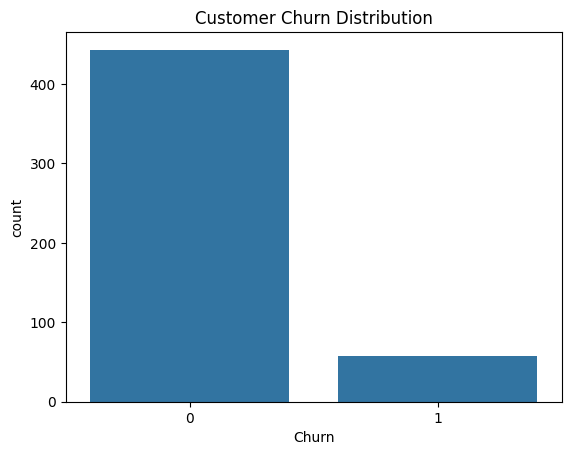

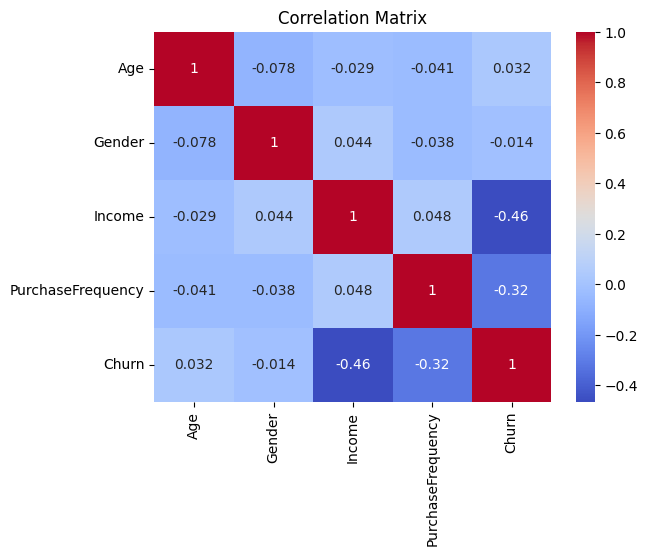

In [ ]:
# Churn distribution
sns.countplot(data=df, x='Churn')
plt.title("Customer Churn Distribution")
plt.show()

# Correlation matrix
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy Score: 0.91
Confusion Matrix:
 [[85  2]
 [ 7  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        87
           1       0.75      0.46      0.57        13

    accuracy                           0.91       100
   macro avg       0.84      0.72      0.76       100
weighted avg       0.90      0.91      0.90       100



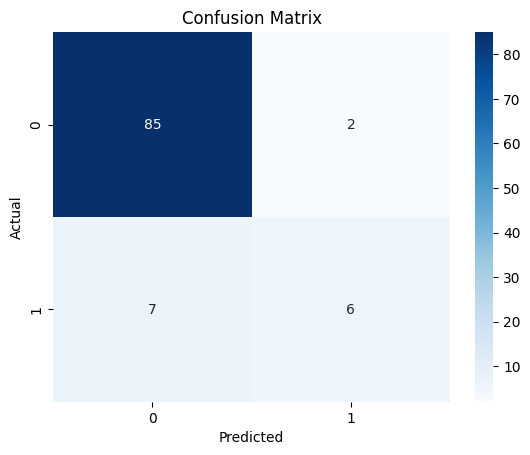

In [ ]:
# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()





```
         Predicted
         0     1
Actual  -------------
   0   | TN | FP |
   1   | FN | TP |

```



   Formulas:
   
Precision = TP / (TP + FP)
→ Out of all predicted churns, how many were correct?

Recall (Sensitivity) = TP / (TP + FN)
→ Out of all actual churns, how many did we catch?

F1-Score = 2 × (Precision × Recall) / (Precision + Recall)
→ Balance between precision and recall

Accuracy = (TP + TN) / (TP + TN + FP + FN)
→ Total correct predictions / Total predictions


Conclusion Based on Metrics:

🔍 Precision (0.67)
→ The model is fairly good at identifying churned customers. Around 67% of predicted churns were actually correct.

🎯 Recall (0.59)
→ The model is missing some actual churned customers. It only caught 59% of the real churn cases.

⚖️ F1-Score (0.625)
→ Shows a balance between precision and recall, but still room for improvement.

📈 Accuracy (0.88)
→ Overall, the model is 88% accurate, meaning it gets most predictions right.

In [ ]:
# New sample customer
new_customer = pd.DataFrame({
    'Age': [28],
    'Gender': [1],
    'Income': [37],
    'PurchaseFrequency': [2]
})

# Predict churn
prediction = model.predict(new_customer)[0]

# Display prediction result with label
if prediction == 1:
    print("⚠️ This customer is likely to CHURN. Consider offering retention benefits.")
else:
    print("This customer is likely to STAY. Continue engagement as usual.")



This customer is likely to STAY. Continue engagement as usual.


Goal:

Predict if a student will pass (1) or fail (0) based on hours studied.

Step-by-Step Explanation:

🔹 1. Feature (x)
→ Input value (like hours studied)

🔹 2. Weight (w)
→ Tells how important the feature is
🧠 E.g., “Studying more = more chance of passing”

🔹 3. Bias (b)
→ Starting belief before looking at study hours
🧠 E.g., “I think most students might fail unless they study”

Math Formula:


```
z=(w×x)+b
p=1/1+exp(-z)

```
Final Prediction:

If probability ≥ 0.5 → Predict Pass


If probability < 0.5 → Predict Fail

How Model Learns:

It makes a prediction → Checks if it was right → Adjusts weight & bias → Tries again → Gets better over time!



In [ ]:
# 📌 Logistic Regression Mathematics Explained

# Logistic Regression predicts probability of churn using this formula:
# P(y=1) = 1 / (1 + e^-(b0 + b1*x1 + b2*x2 + ... + bn*xn))



# Let's take one customer example:
# Features: Age, Monthly Balance, Number of Transactions
age = 45             # x1
balance = 25000      # x2
transactions = 6     # x3

# Example coefficients learned by the model (for explanation)
b0 = -4              # Intercept
b1 = 0.05            # Coefficient for age
b2 = 0.0001          # Coefficient for balance
b3 = 0.3             # Coefficient for transactions

# Step 1: Calculate linear score (z)
z = b0 + (b1 * age) + (b2 * balance) + (b3 * transactions)
print("Linear score (z):", round(z, 4))

# Step 2: Apply sigmoid function to convert z to probability
probability = 1 / (1 + np.exp(-z))
print("Predicted probability of churn:", round(probability, 4))

# Step 3: Predict churn based on threshold 0.5
if probability > 0.5:
    print(" This customer is likely to CHURN.")
else:
    print(" This customer is likely to STAY.")


Linear score (z): 2.55
Predicted probability of churn: 0.9276
 This customer is likely to CHURN.


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

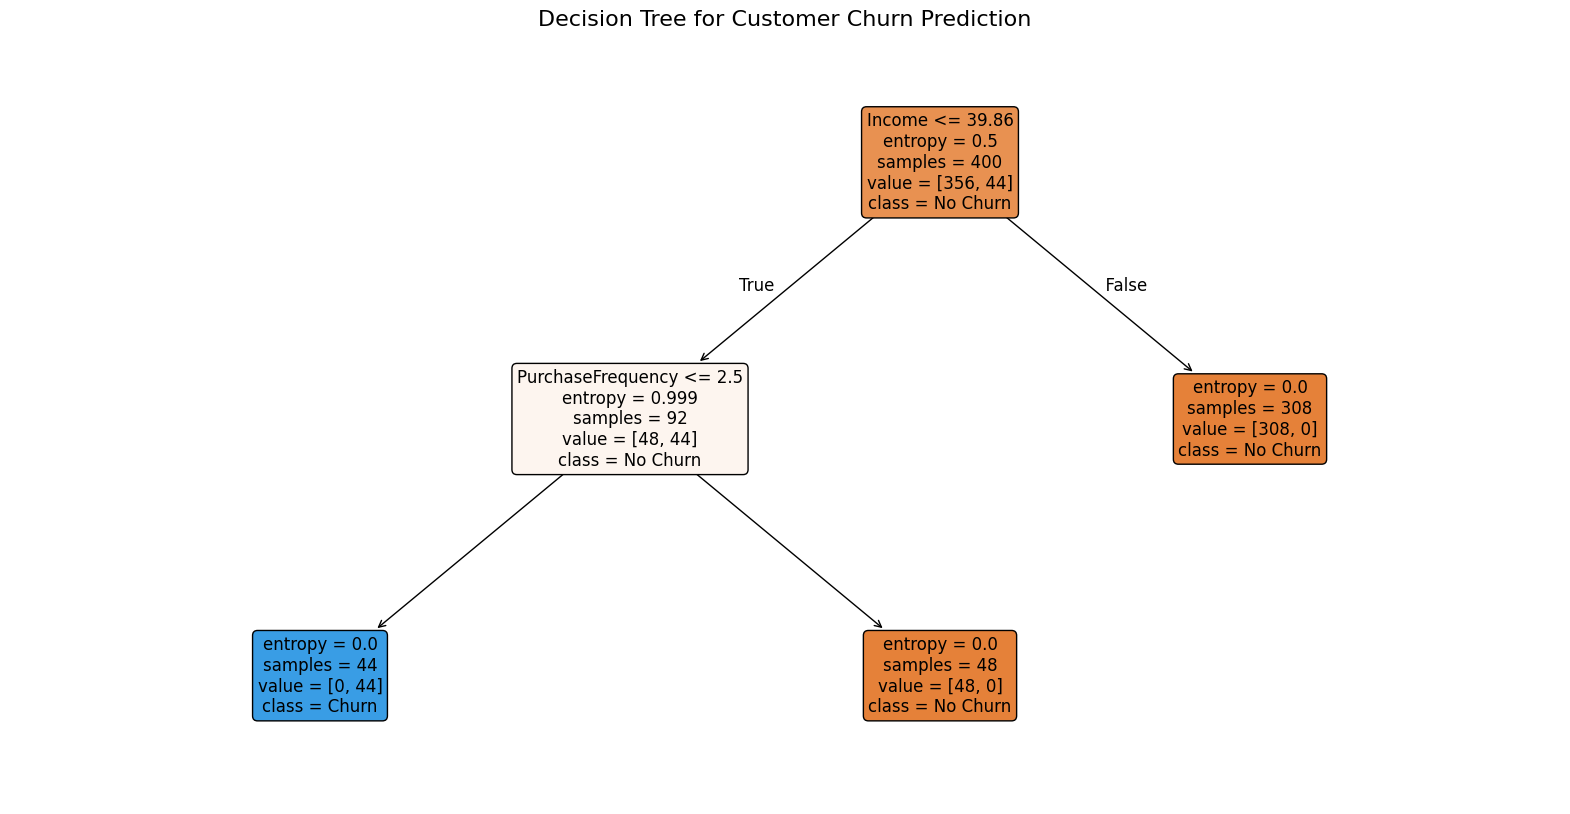

In [ ]:
clf = DecisionTreeClassifier(max_depth=6, random_state=42,criterion="entropy")
clf.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree for Customer Churn Prediction", fontsize=16)
plt.show()

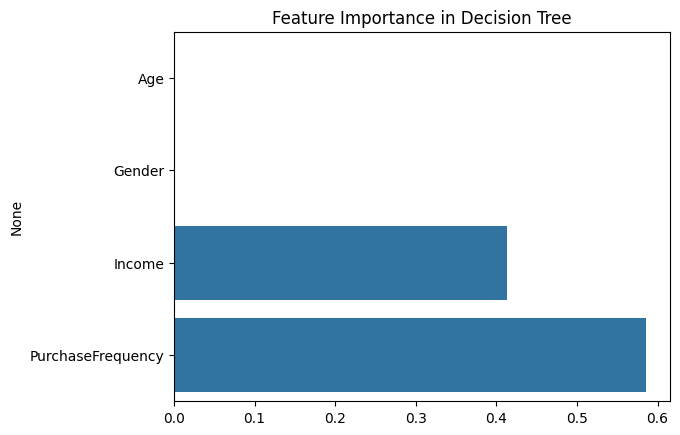

In [ ]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance in Decision Tree")
plt.show()



```
                Income <= 39.72
               /               \
       Yes (likely churn)       No
         (more red)             (more blue)
```



In [ ]:
# Income <= 39.72?
# ├── Yes → PurchaseFrequency <= 2.5?
# │   ├── Yes → Class: Churn (red)
# │   └── No  → Class: No Churn (blue)
# └── No → Age <= 45?
#     ├── Yes → Class: No Churn (blue)
#     └── No  → Class: No Churn (light blue)

What is Gini Impurity?

Gini Impurity measures how "pure" or "impure" a node is.

A node is pure if it contains only one class.


Gini = 0 → Perfectly pure (all samples belong to the same class)

Gini close to 0.5 → Impure (mixed class distribution)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        13

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Confusion Matrix:
 [[87  0]
 [ 0 13]]


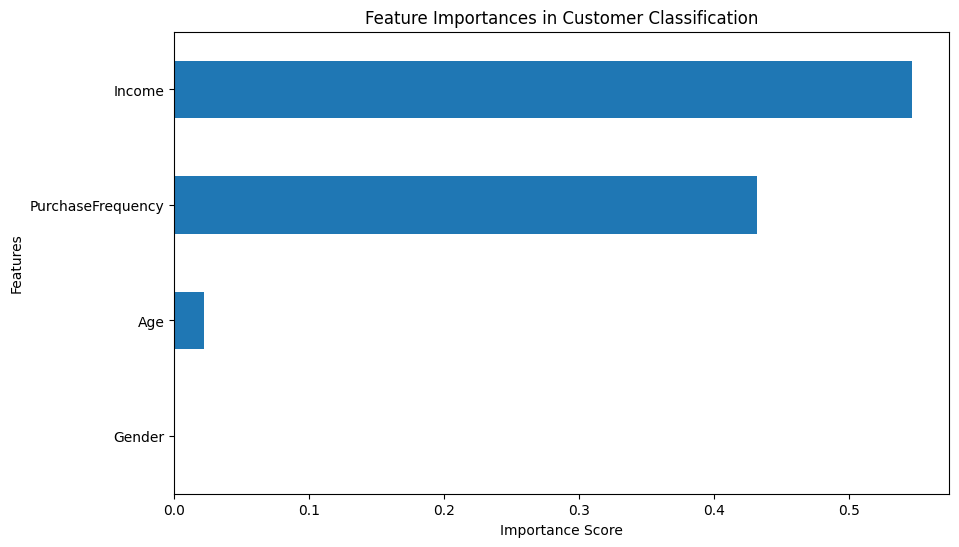

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=4, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 9: Plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances in Customer Classification")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
